In [69]:
import pandas as pd
df = pd.read_csv("Attritiondata.csv")

# Exploratory Data Analysis 

In [70]:
df.head()
df.tail()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2053,0,39,1,722,2,24,1,2,1,2933,...,1,80,1,21,2,2,20,9,9,6
2054,0,36,2,884,0,23,2,3,1,2936,...,3,80,1,17,3,3,5,2,0,3
2055,0,27,1,155,0,4,3,4,1,2938,...,2,80,1,6,0,3,6,2,0,3
2056,0,49,2,1023,2,2,3,3,1,2939,...,4,80,0,17,3,2,9,6,0,8
2057,0,34,1,628,0,8,3,3,1,2940,...,1,80,0,6,3,4,4,3,1,2


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 35 columns):
Attrition                   2058 non-null int64
Age                         2058 non-null int64
BusinessTravel              2058 non-null int64
DailyRate                   2058 non-null int64
Department                  2058 non-null int64
DistanceFromHome            2058 non-null int64
Education                   2058 non-null int64
EducationField              2058 non-null int64
EmployeeCount               2058 non-null int64
EmployeeNumber              2058 non-null int64
EnvironmentSatisfaction     2058 non-null int64
Gender                      2058 non-null int64
HourlyRate                  2058 non-null int64
JobInvolvement              2058 non-null int64
JobLevel                    2058 non-null int64
JobRole                     2058 non-null int64
JobSatisfaction             2058 non-null int64
MaritalStatus               2058 non-null int64
MonthlyIncome               2

In [72]:
df.shape

(2058, 35)

In [99]:
list(df.columns)

['Attrition',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Both categorical and numerical data are in int format, convert into proper formates

In [73]:
df[['Age','BusinessTravel','Department','Education','EducationField','EmployeeCount','Gender','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','Over18','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']] = df[['Age','BusinessTravel','Department','Education','EducationField','EmployeeCount','Gender','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','Over18','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']].astype('object')

In [74]:
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Correlation Matrix

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

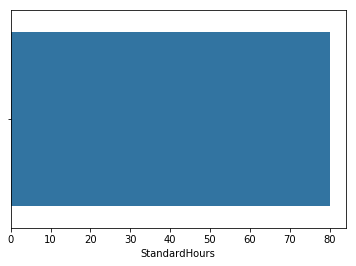

In [76]:
sns.barplot(df['StandardHours'])
plt.show()

StandardHours is contant throughout and hence, it does not convey any information. Thus, drop it in modeling

In [77]:
df_corr = df.drop(['StandardHours','Attrition'],axis = 1).corr()

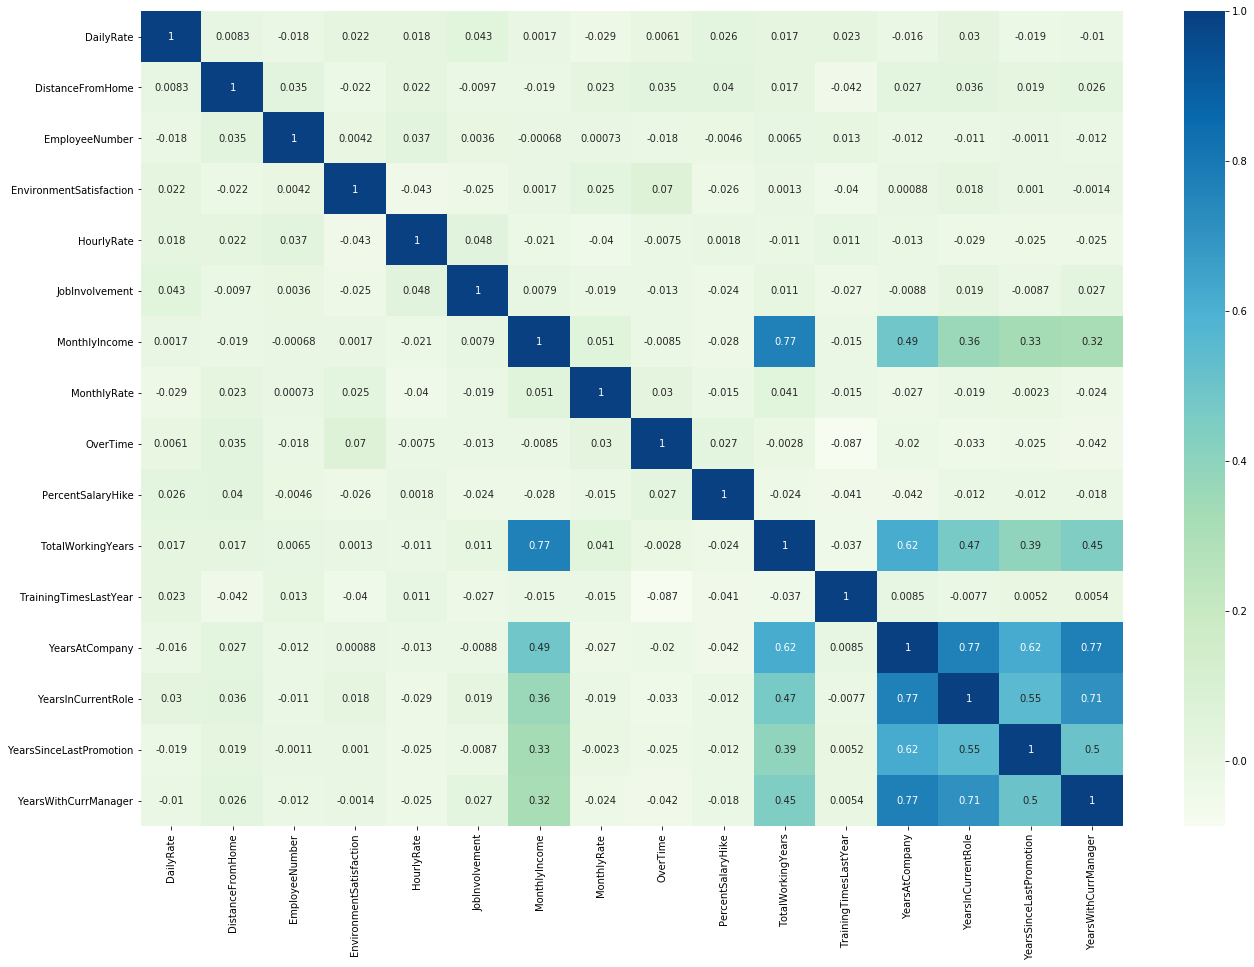

In [78]:
plt.subplots(figsize=(22,15))
sns.heatmap(df_corr, cmap='GnBu', annot=True)
plt.show()

1. StandardHours is same for all employee, hence drop it
2. YearsWithCurrManager is moderately +ve correlated with YearsSinceLastPromotion
3. YearsWithCurrManager is highly +ve correlated with YearsInCurrentRole
4. YearsWithCurrManager is highly correlated with YearsAtCompany
5. YearsWithCurrManager is moderatly +ve correlated with TotalWorkingYears
6. YearsWithCurrManager is +ve correlated with MonthlyIncome
7. YearsSinceLastPromotion is +ve correlated with MonthlyIncome
8. YearsSinceLastPromotion is +ve correlated with TotalWorkingYears
9. YearsSinceLastPromotion is moderately +ve correlated with YearsAtCompany
10. YearsSinceLastPromotion is moderately +ve correlated with YearsInCurrentRole
11. YearsInCurrentRole is +ve correlated with MonthlyIncome
12. YearsInCurrentRole is +ve correlated with TotalWorkingYears
13. YearsInCurrentRole is highly +ve correlated with YearsAtCompany
14. YearsAtCompany is +ve correlated with MonthlyIncome
15. YearsAtCompany is highly +ve correlated with TotalWorkingYears
16. TotalWorkingYears is highly +ve correlated with MonthlyIncome 

As it's confusing to select features we shall use PCA for auto selection 

In [79]:
X = df.drop(['StandardHours', 'Attrition'], axis = 1)

In [80]:
y = df['Attrition']

In [81]:
def ScaleFeature (x):
    from sklearn.preprocessing import  StandardScaler
    if (x.dtype.name != 'object'):
        scale = StandardScaler()
        x = x.astype('float') 
        x = scale.fit_transform(x.values.reshape(-1,1))
        return (x.reshape(len(x),))
    else:
        return(x)
        

In [82]:
dummy = pd.DataFrame()
for eachfeature in list(X.columns):
    dummy[eachfeature] = ScaleFeature(X[eachfeature])
X = pd.DataFrame(dummy)

In [83]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.747513,2,-1.009027,2,4,1,-1.756410,-0.653618,...,3,1,0,-0.430575,-2.150070,1,-0.160696,-0.064891,-0.673097,0.247192
1,37,1,1.424117,0,-0.884756,2,5,1,-1.754054,1.177758,...,3,2,0,-0.558720,0.164986,3,-1.148389,-1.159533,-0.673097,-1.140482
2,32,2,0.505333,0,-0.884756,2,4,1,-1.750521,1.177758,...,3,3,0,-0.430575,-0.606699,2,0.003919,0.756090,0.241450,0.524727
3,59,1,1.301779,0,-0.760484,3,3,1,-1.749343,0.262070,...,4,1,3,0.082005,0.164986,2,-0.983774,-1.159533,-0.673097,-1.140482
4,30,1,1.386667,0,1.849219,1,4,1,-1.748165,1.177758,...,4,2,1,-1.327590,-0.606699,3,-0.983774,-1.159533,-0.673097,-1.140482


# Data Preparation, Training and Testing

Split data into training and testing set in ratio of 80:20

In [84]:
from sklearn.model_selection import  train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, stratify = y, test_size = 0.2)

In [85]:
from sklearn.decomposition import  PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report

In [86]:
pipe = Pipeline(steps = [('pca',PCA()), ('RF',RandomForestClassifier())])

In [87]:
pipe.fit(train_X, train_Y)
print('Train Score {}'.format(accuracy_score(train_Y, pipe.predict(train_X))))
print('Test Score {}'.format(accuracy_score(test_Y, pipe.predict(test_X))))

Train Score 0.9896719319562576
Test Score 0.8786407766990292


Verify train accuracy using kfold cross validation method

In [88]:
kfold = 10 # an estimate is taken condering data size
estimate = cross_val_score(estimator = pipe, X = train_X, y = train_Y, scoring = 'accuracy', cv = kfold, n_jobs= 1)
# cv indicates k-fold value/ no. of iterations
# n_jobs = -1 will use all CPUs available
print('Accuracy in each iterations {}'.format(estimate))
print('\n')
print('Average Accuracy is {}'.format(estimate.mean()))

Accuracy in each iterations [ 0.89090909  0.87272727  0.89090909  0.85454545  0.86060606  0.84242424
  0.87804878  0.88414634  0.87195122  0.88414634]


Average Accuracy is 0.8730413895048041


### Confusion matrix, precision, recall and f1-score

In [89]:
print(confusion_matrix(test_Y, pipe.predict(test_X)))

[[343   3]
 [ 47  19]]


In [90]:
print(classification_report(test_Y, pipe.predict(test_X)))

             precision    recall  f1-score   support

          0       0.88      0.99      0.93       346
          1       0.86      0.29      0.43        66

avg / total       0.88      0.88      0.85       412



#### Accuracy difference between 'Train Score' and 'Average Accuracy' is approx. 10. Assuming '10' as large value indicates, 'pipe' model is over-fitted. To handle overfitting - let's try out finding optimal hyperparameters using GridSearchCV.

### Finding Optimal Parameters using GridSearchCV

In [91]:
RandomForestClassifier()
# min_samples_leaf, max_features

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
PCA() 
# n_components is key parameter 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
from sklearn.model_selection import  GridSearchCV
N_FEATURES_OPTIONS = [1,10, 20, 30]
max_features_option = [1, 3, 5, 10, 15, 20, 15, 30]
param_grid = [
    {
        'pca__n_components': N_FEATURES_OPTIONS
    },
    {
        'RF__max_features': max_features_option
    },
]

grid_estimator = GridSearchCV(estimator= pipe, 
                              param_grid= param_grid, n_jobs = 1)
grid_estimator.fit(train_X,train_Y)
grid_estimator.best_params_

{'pca__n_components': 10}

pca with n_components = 30 and rest default parameters are estimated to be best hyperparameters

# Re-fitting model with optimal hyper-parameters

In [94]:
pipe = Pipeline(steps = [('pca',PCA(n_components = 30)), ('RF',RandomForestClassifier())])

In [95]:
pipe.fit(train_X, train_Y)
print('Train Score {}'.format(accuracy_score(train_Y, pipe.predict(train_X))))
print('Test Score {}'.format(accuracy_score(test_Y, pipe.predict(test_X))))

Train Score 0.9896719319562576
Test Score 0.8713592233009708


In [96]:
kfold = 10 # an estimate is taken condering data size
estimate = cross_val_score(estimator = pipe, X = train_X, y = train_Y, scoring = 'accuracy', cv = kfold, n_jobs= 1)
# cv indicates k-fold value/ no. of iterations
# n_jobs = -1 will use all CPUs available
print('Accuracy in each iterations {}'.format(estimate))
print('\n')
print('Average Accuracy is {}'.format(estimate.mean()))

Accuracy in each iterations [ 0.87272727  0.86666667  0.88484848  0.86666667  0.86666667  0.84848485
  0.87195122  0.90243902  0.87804878  0.8902439 ]


Average Accuracy is 0.8748743532889873


Slightest improvement in accuracy with n_components = 30

# Model Evaluation

### Confusion matrix, precision, recall and f1 score

In [97]:
print(confusion_matrix(test_Y, pipe.predict(test_X)))

[[342   4]
 [ 49  17]]


In [98]:
print(classification_report(test_Y, pipe.predict(test_X)))

             precision    recall  f1-score   support

          0       0.87      0.99      0.93       346
          1       0.81      0.26      0.39        66

avg / total       0.86      0.87      0.84       412



#Interpretation - 
#86% of the negative samples are not classfied as postive
#87% of positive samples are correctly classified
#Average weight of precision and recall is 83 percentage